In [1]:
import scanpy as sc 
import pandas as pd
import os
import warnings
import anndata as ad
from anndata import AnnData

warnings.filterwarnings('ignore') 

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


In [3]:
results_file = "C:/Users/supak/github/resultsc/GSE184950_test.h5ad"

In [4]:
directory = 'C:/Users/supak/workplace/singlecell/GSE184950_RAW/data/'
dirs = os.listdir(directory)
print(dirs)

['GSM5602315_A10_CTL_filtered_feature_bc_matrix', 'GSM5602316_A15_PDD_filtered_feature_bc_matrix', 'GSM5602317_A18_PDD_filtered_feature_bc_matrix', 'GSM5602318_A2_CTL_filtered_feature_bc_matrix', 'GSM5602319_A29_PDD_filtered_feature_bc_matrix', 'GSM5602320_A31_PDD_filtered_feature_bc_matrix', 'GSM5602321_A38_PDD_filtered_feature_bc_matrix', 'GSM5602322_B13_PDD_filtered_feature_bc_matrix', 'GSM5602323_B19_PDD_filtered_feature_bc_matrix', 'GSM5602324_B25_PD_filtered_feature_bc_matrix', 'GSM5602325_B28_PDD_filtered_feature_bc_matrix', 'GSM5602326_B33_PDD_filtered_feature_bc_matrix', 'GSM5602327_B5_CTL_filtered_feature_bc_matrix', 'GSM5602328_B9_CTL_filtered_feature_bc_matrix', 'GSM5602329_C1_CTL_filtered_feature_bc_matrix', 'GSM5602330_C11_PD_filtered_feature_bc_matrix', 'GSM5602331_C18_PD_filtered_feature_bc_matrix', 'GSM5602332_C20_PD_filtered_feature_bc_matrix', 'GSM5602333_C26_PDD_filtered_feature_bc_matrix', 'GSM5602335_C8_CTL_filtered_feature_bc_matrix', 'GSM5602336_D16_PDD_filtered

### **Create AnnData object**

In [5]:
dfs = []

patient_adata_list = []

for filename in dirs:
    
    name = filename.replace('_filtered_feature_bc_matrix', '').split('_')
    Patient = name[1]
    Type = name[2]
    
    matrix_file = os.path.join(directory, filename)
    
    adata = sc.read_10x_mtx(matrix_file,
                            var_names='gene_symbols')
    
    adata.var_names_make_unique()
    
    patient_adata_list.append(adata)
        
    adata.obs['Patient'] = Patient
    adata.obs['Type'] = Type
    
    df = pd.DataFrame(adata.obs)
    
    dfs.append(df)
    
merge_df = pd.concat(dfs)



--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading fr

In [6]:
merged_adata = ad.concat(patient_adata_list, join='outer', merge='same')

In [7]:
print(merged_adata.obs.value_counts())
print(merged_adata.obs.Patient)

Patient  Type
A29      PDD     27603
A38      PDD     22577
C20      PD      21450
C18      PD      19620
D27      PD      19263
A31      PDD     18841
p5       CTL     18829
B19      PDD     18811
A22      PDD     18139
A18      PDD     17752
D20      PDD     15832
D16      PDD     14933
p4       CTL     14068
D29      PDD     13202
C26      PDD     12615
A15      PDD     11760
D33      PDD     11738
A2       CTL     11055
C8       CTL     10243
C11      PD       9683
C1       CTL      7804
B33      PDD      7489
B9       CTL      7421
p12      PD       6508
B25      PD       6356
B28      PDD      6193
B5       CTL      5017
D3       CTL      4782
B13      PDD      3608
A10      CTL      2165
Name: count, dtype: int64
AAACCCACATCGCTAA-1    A10
AAACCCATCACATACG-1    A10
AAACCCATCGCAACAT-1    A10
AAACGAATCACAATGC-1    A10
AAACGAATCTAACGCA-1    A10
                     ... 
TTTGTTGTCAGTCATG-1    A22
TTTGTTGTCCATACAG-1    A22
TTTGTTGTCCTTGACC-1    A22
TTTGTTGTCGCTGACG-1    A22
TTTGTTGTCT

In [8]:
merged_adata.var["mt"] = merged_adata.var_names.str.startswith("MT-")

sc.pp.calculate_qc_metrics(
    merged_adata, qc_vars=["mt"], 
    percent_top=None, 
    log1p=False, 
    inplace=True)

In [9]:
merged_adata

AnnData object with n_obs × n_vars = 385357 × 33538
    obs: 'Patient', 'Type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### **Plot QC**

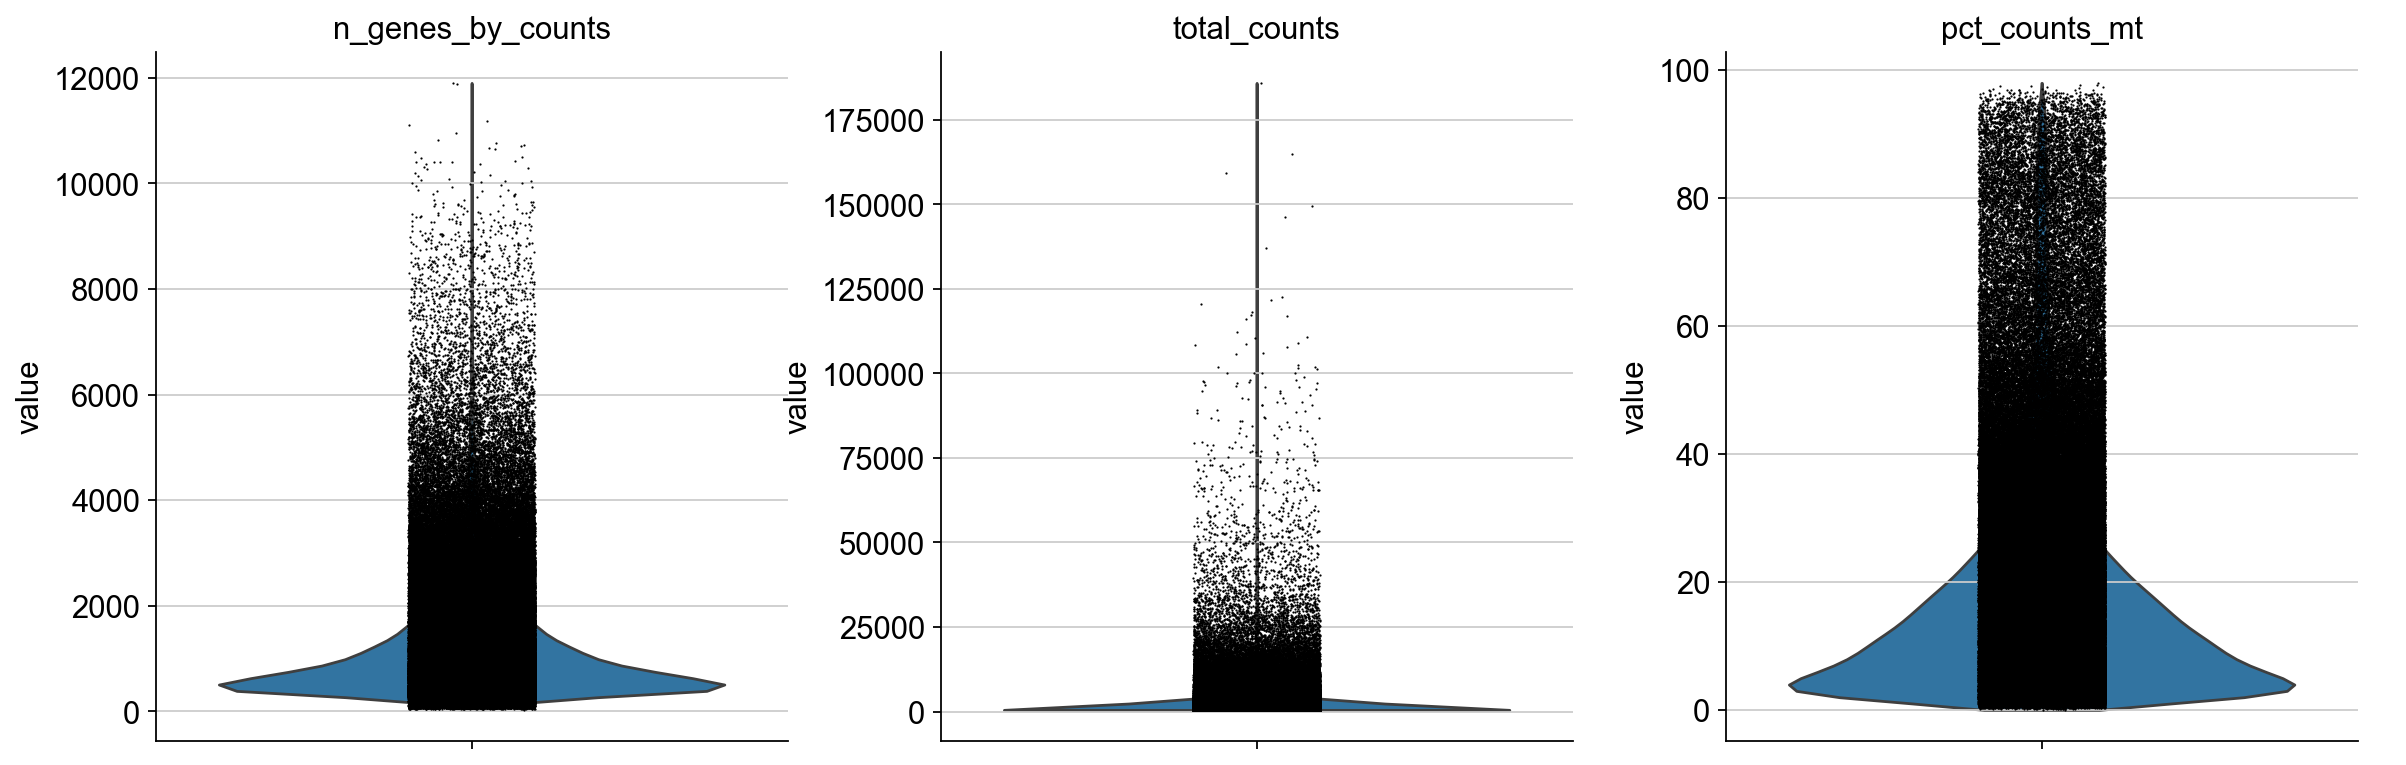

In [10]:
sc.pl.violin(
    merged_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.1,
    multi_panel=True)

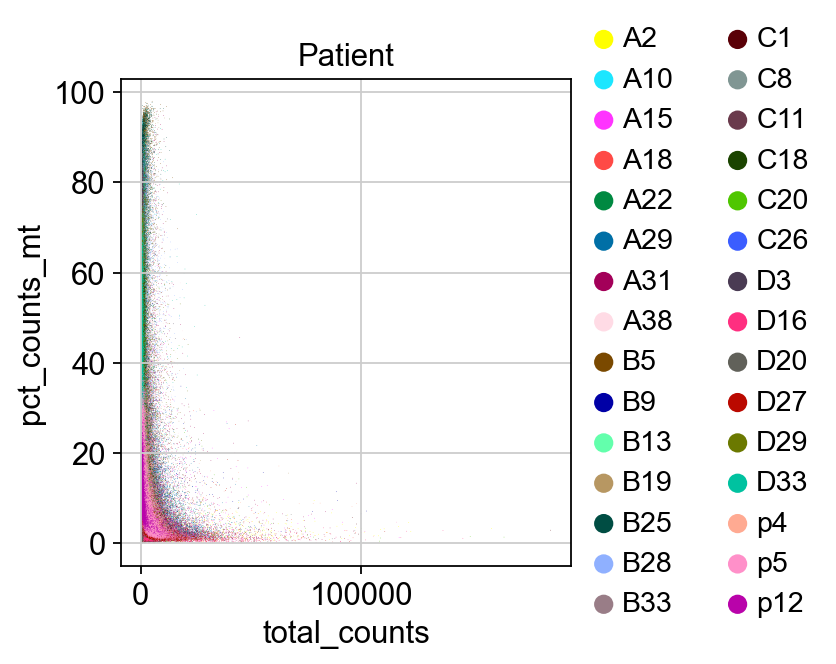

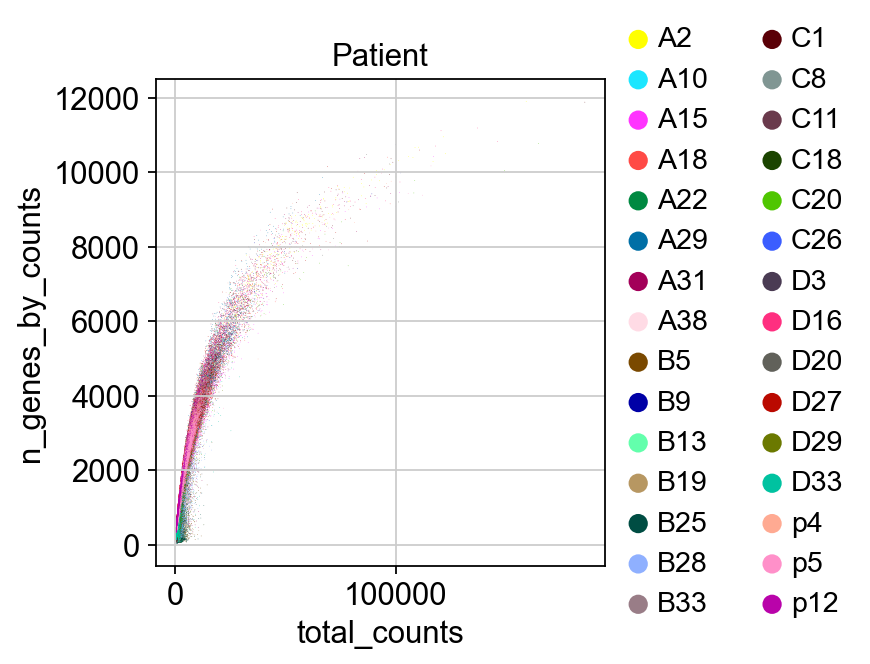

In [11]:
sc.pl.scatter(merged_adata, x="total_counts", y="pct_counts_mt", color="Patient")
sc.pl.scatter(merged_adata, x="total_counts", y="n_genes_by_counts", color="Patient")

### **Filtering**

In [12]:
sc.pp.filter_cells(merged_adata, min_genes=200)
sc.pp.filter_cells(merged_adata, max_genes=5000)
merged_adata = merged_adata[merged_adata.obs.pct_counts_mt < 20, :]
merged_adata = merged_adata[merged_adata.obs.total_counts < 20000, :]
merged_adata = merged_adata[merged_adata.obs.total_counts > 300, :]

filtered out 6865 cells that have less than 200 genes expressed
filtered out 4112 cells that have more than 5000 genes expressed


In [13]:
merged_adata

View of AnnData object with n_obs × n_vars = 267376 × 33538
    obs: 'Patient', 'Type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Patient_colors'

normalizing counts per cell
    finished (0:00:04)


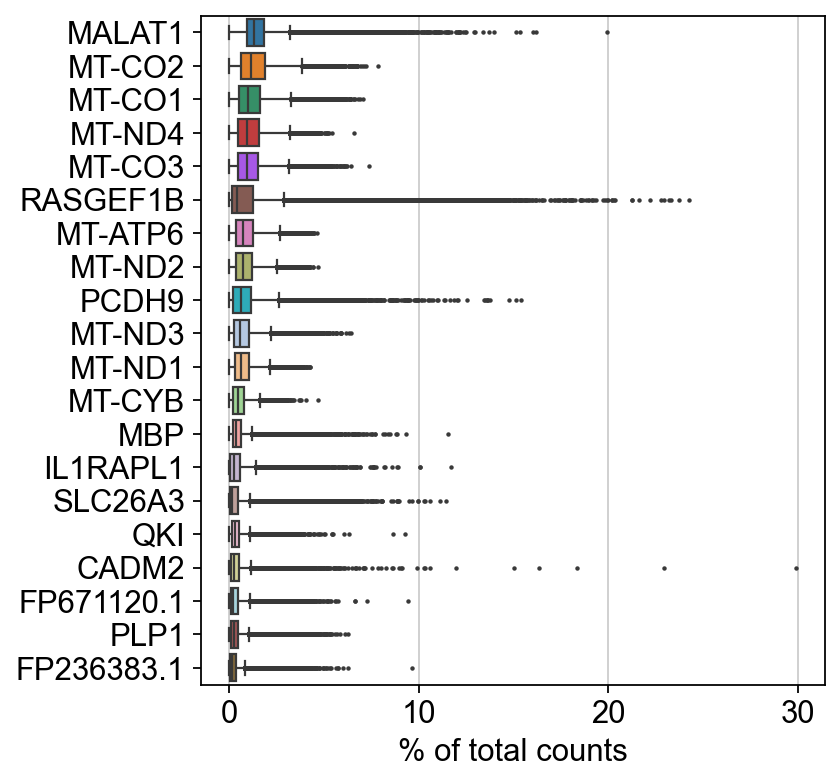

In [14]:
sc.pl.highest_expr_genes(merged_adata, n_top=20)

### **Plot after filtering**

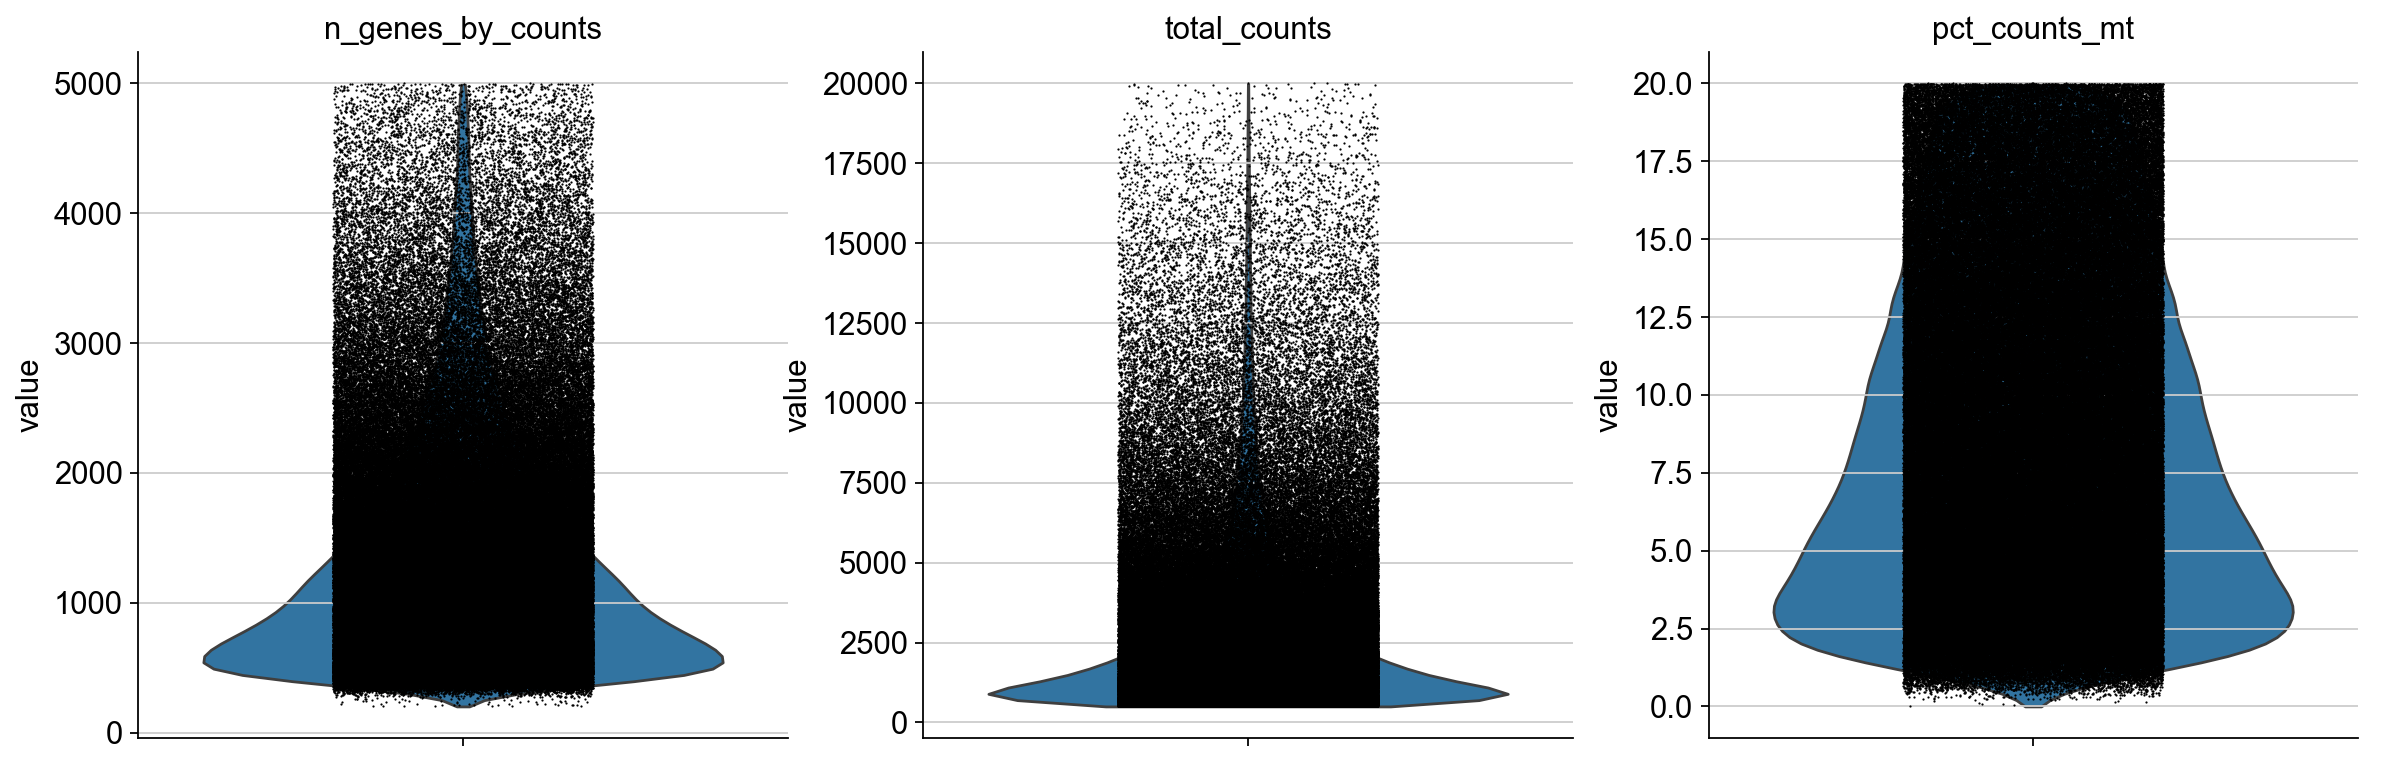

In [15]:
sc.pl.violin(
    merged_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.2,
    multi_panel=True)

### **Normalization**

In [16]:
sc.pp.normalize_total(merged_adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:01)


In [17]:
sc.pp.log1p(merged_adata)

In [18]:
sc.pp.highly_variable_genes(merged_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:10)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


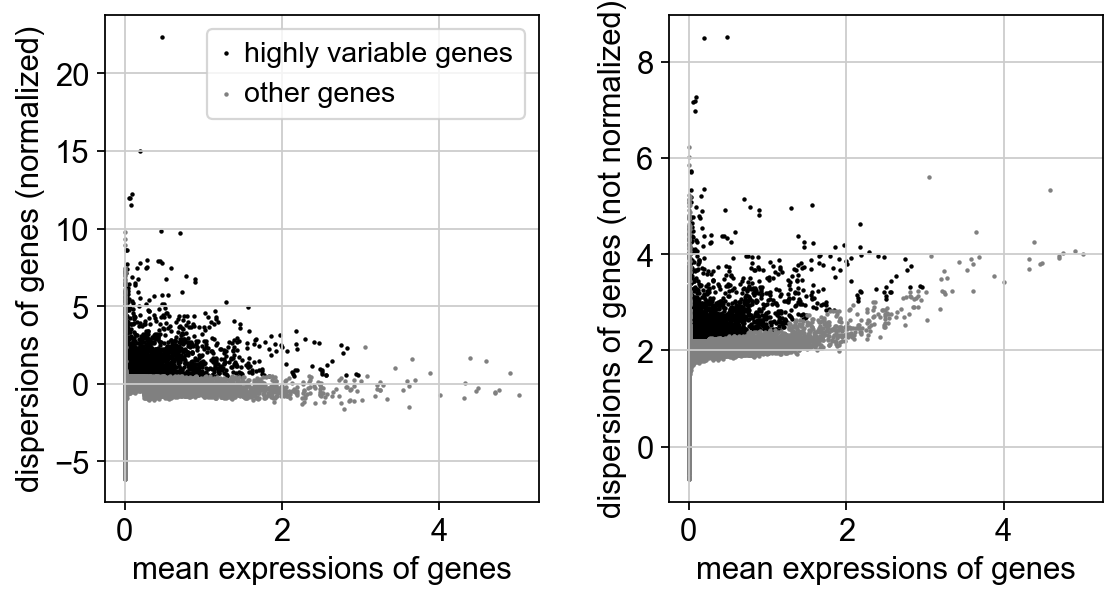

In [19]:
sc.pl.highly_variable_genes(merged_adata)

**Create .raw file**

In [20]:
merged_adata.raw = merged_adata

In [21]:
merged_adata = merged_adata[:, merged_adata.var.highly_variable]

### **Regress out unwanted variable**

In [22]:
sc.pp.regress_out(merged_adata, ["pct_counts_mt", "total_counts"])

regressing out ['pct_counts_mt', 'total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:14:52)


### **Scale Data**

In [23]:
sc.pp.scale(merged_adata, max_value=10)

### **Plot PCA**

In [24]:
sc.tl.pca(merged_adata, svd_solver="arpack")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:27)


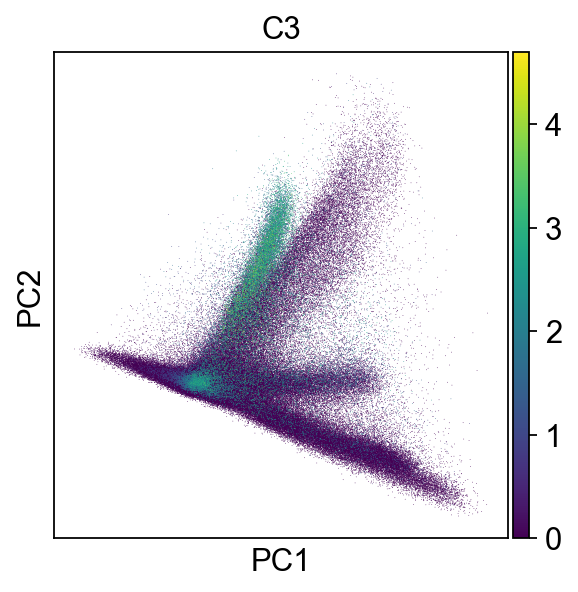

In [25]:
sc.pl.pca(merged_adata, color="C3")

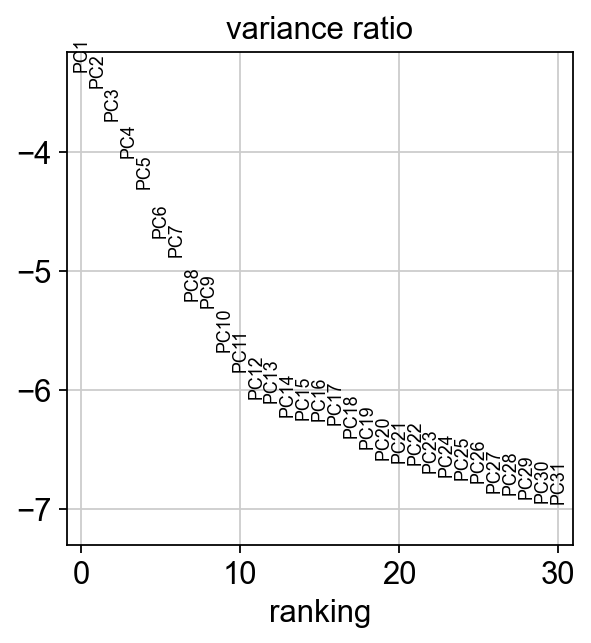

In [26]:
sc.pl.pca_variance_ratio(merged_adata, log=True)

In [27]:
merged_adata.write(results_file)

### **Find Neighbors and Plot UMAP**

In [28]:
sc.pp.neighbors(merged_adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)


In [29]:
sc.tl.umap(merged_adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:11)


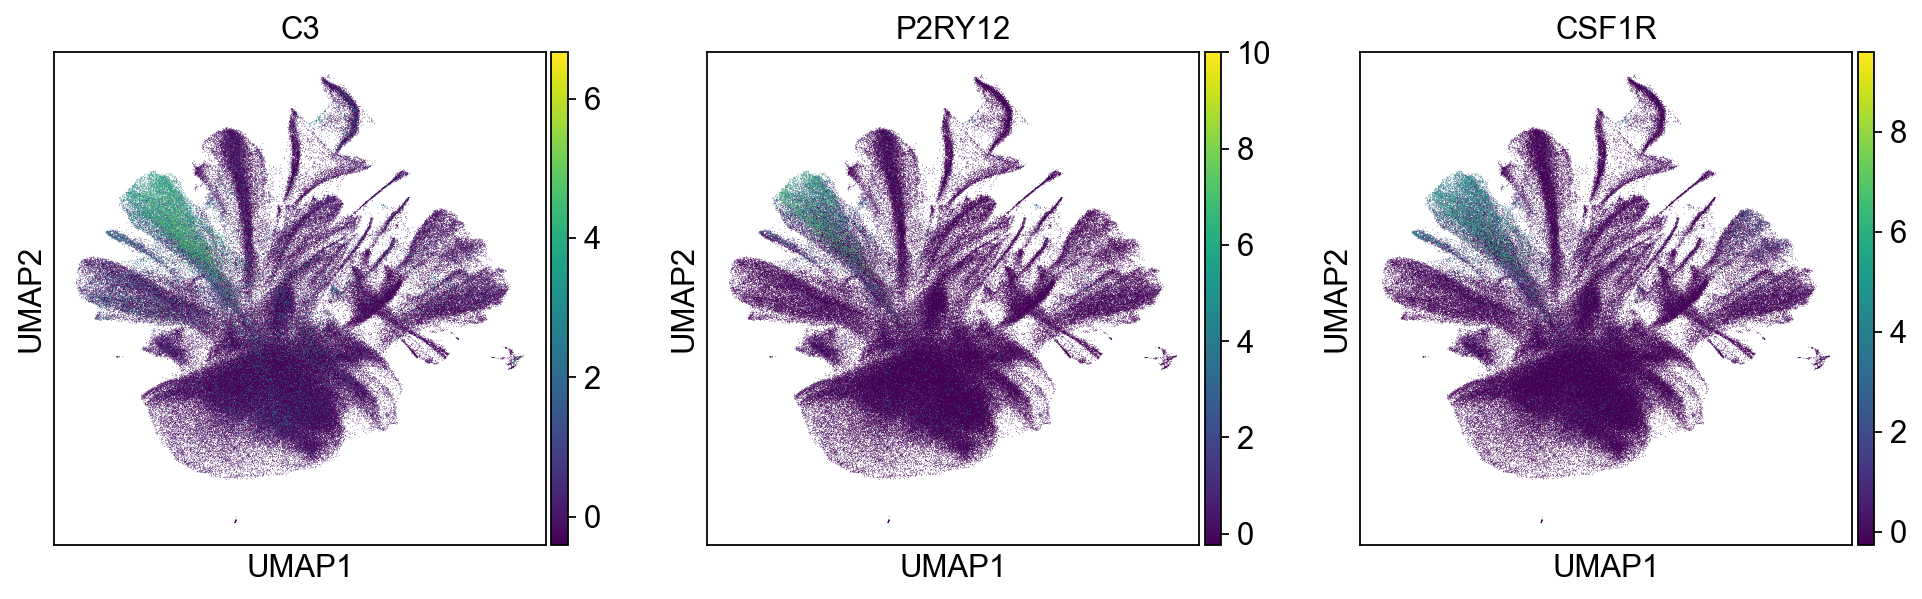

In [31]:
sc.pl.umap(merged_adata, color=["C3", "P2RY12", "CSF1R"], use_raw=False)

### **Clustering**

In [32]:
sc.tl.leiden(
    merged_adata,
    resolution=0.5,
    random_state=0,
    n_iterations=2,
    directed=False,
)

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:16)


In [33]:
merged_adata.var_names

Index(['HES4', 'ISG15', 'FNDC10', 'GABRD', 'PRDM16', 'CHD5', 'SLC2A5',
       'PIK3CD', 'CTNNBIP1', 'UBE4B',
       ...
       'ERG', 'ETS2', 'SH3BGR', 'DSCAM', 'BACE2', 'SUMO3', 'SLC19A1', 'PCBP3',
       'COL6A2', 'MT-ND6'],
      dtype='object', length=2376)

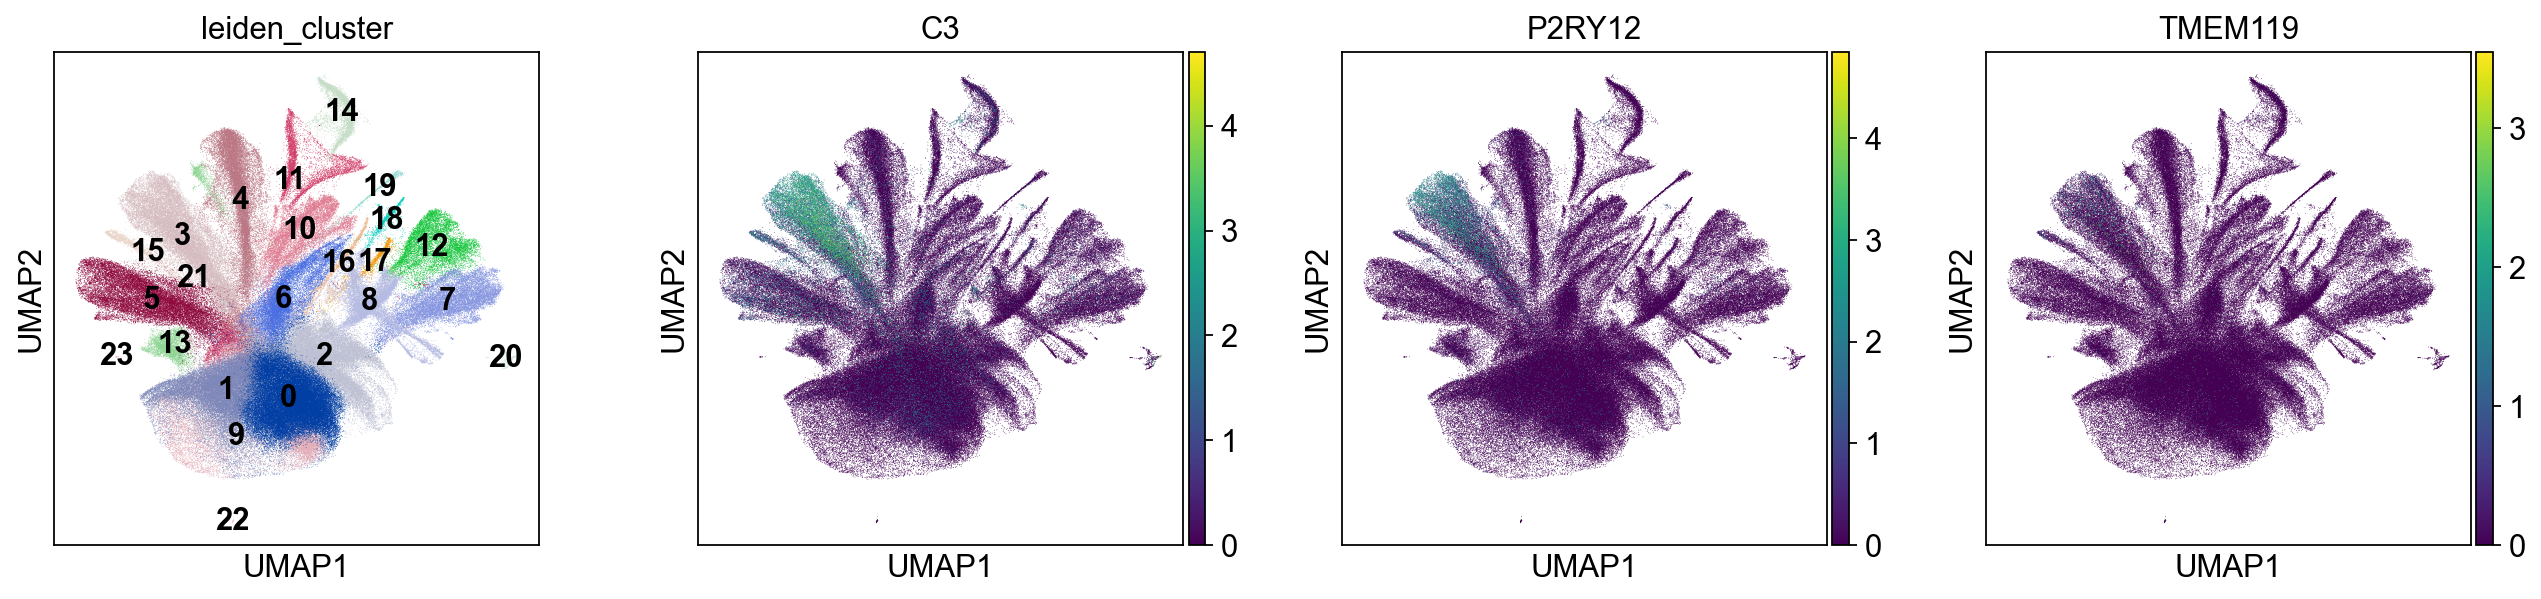

In [34]:
sc.pl.umap(merged_adata, color=["leiden", "C3", "P2RY12", "TMEM119"], legend_loc="on data", title="leiden_cluster")

In [35]:
merged_adata.write(results_file)

### **Rank Gene Group**

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:30)


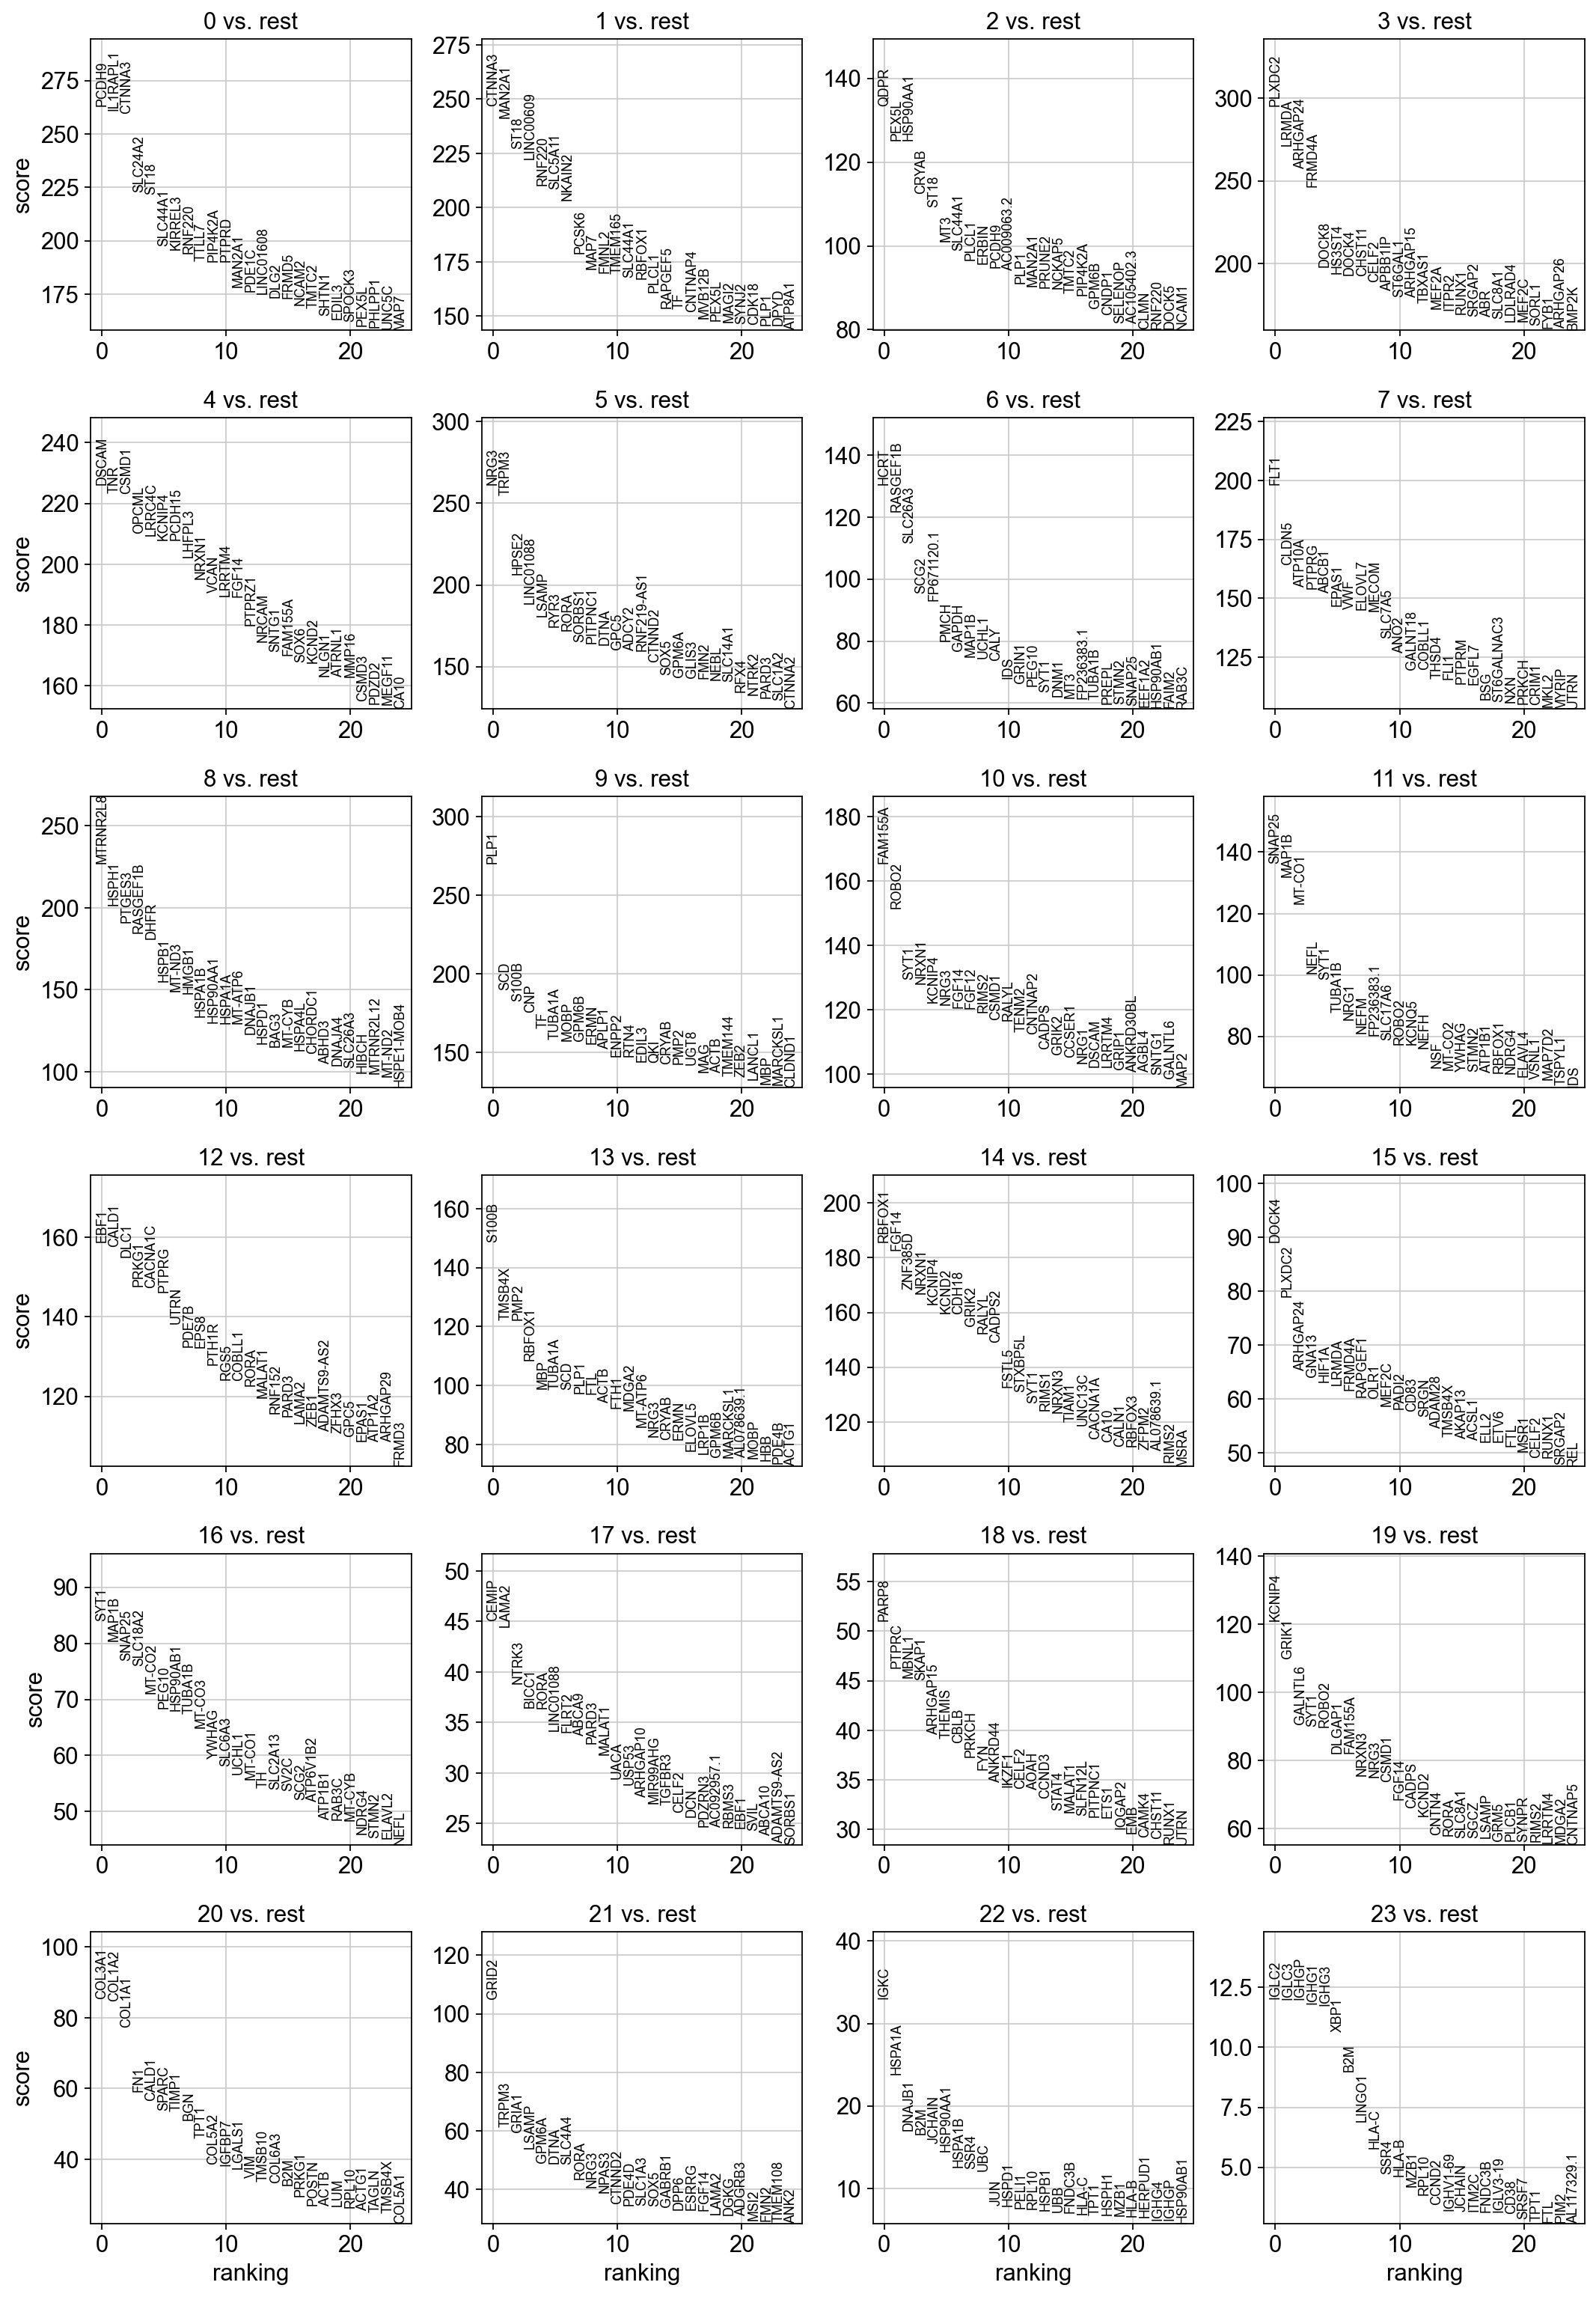

In [36]:
# Methods can be 't-test', 't-test_overestim_var' for overreestimates varience of each group
# 'wilcoxon' for rank-sum
# 'logreg' for logistic regression

sc.tl.rank_genes_groups(merged_adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(merged_adata, n_genes=25, sharey=False, ncols=4)

In [37]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:21:11)


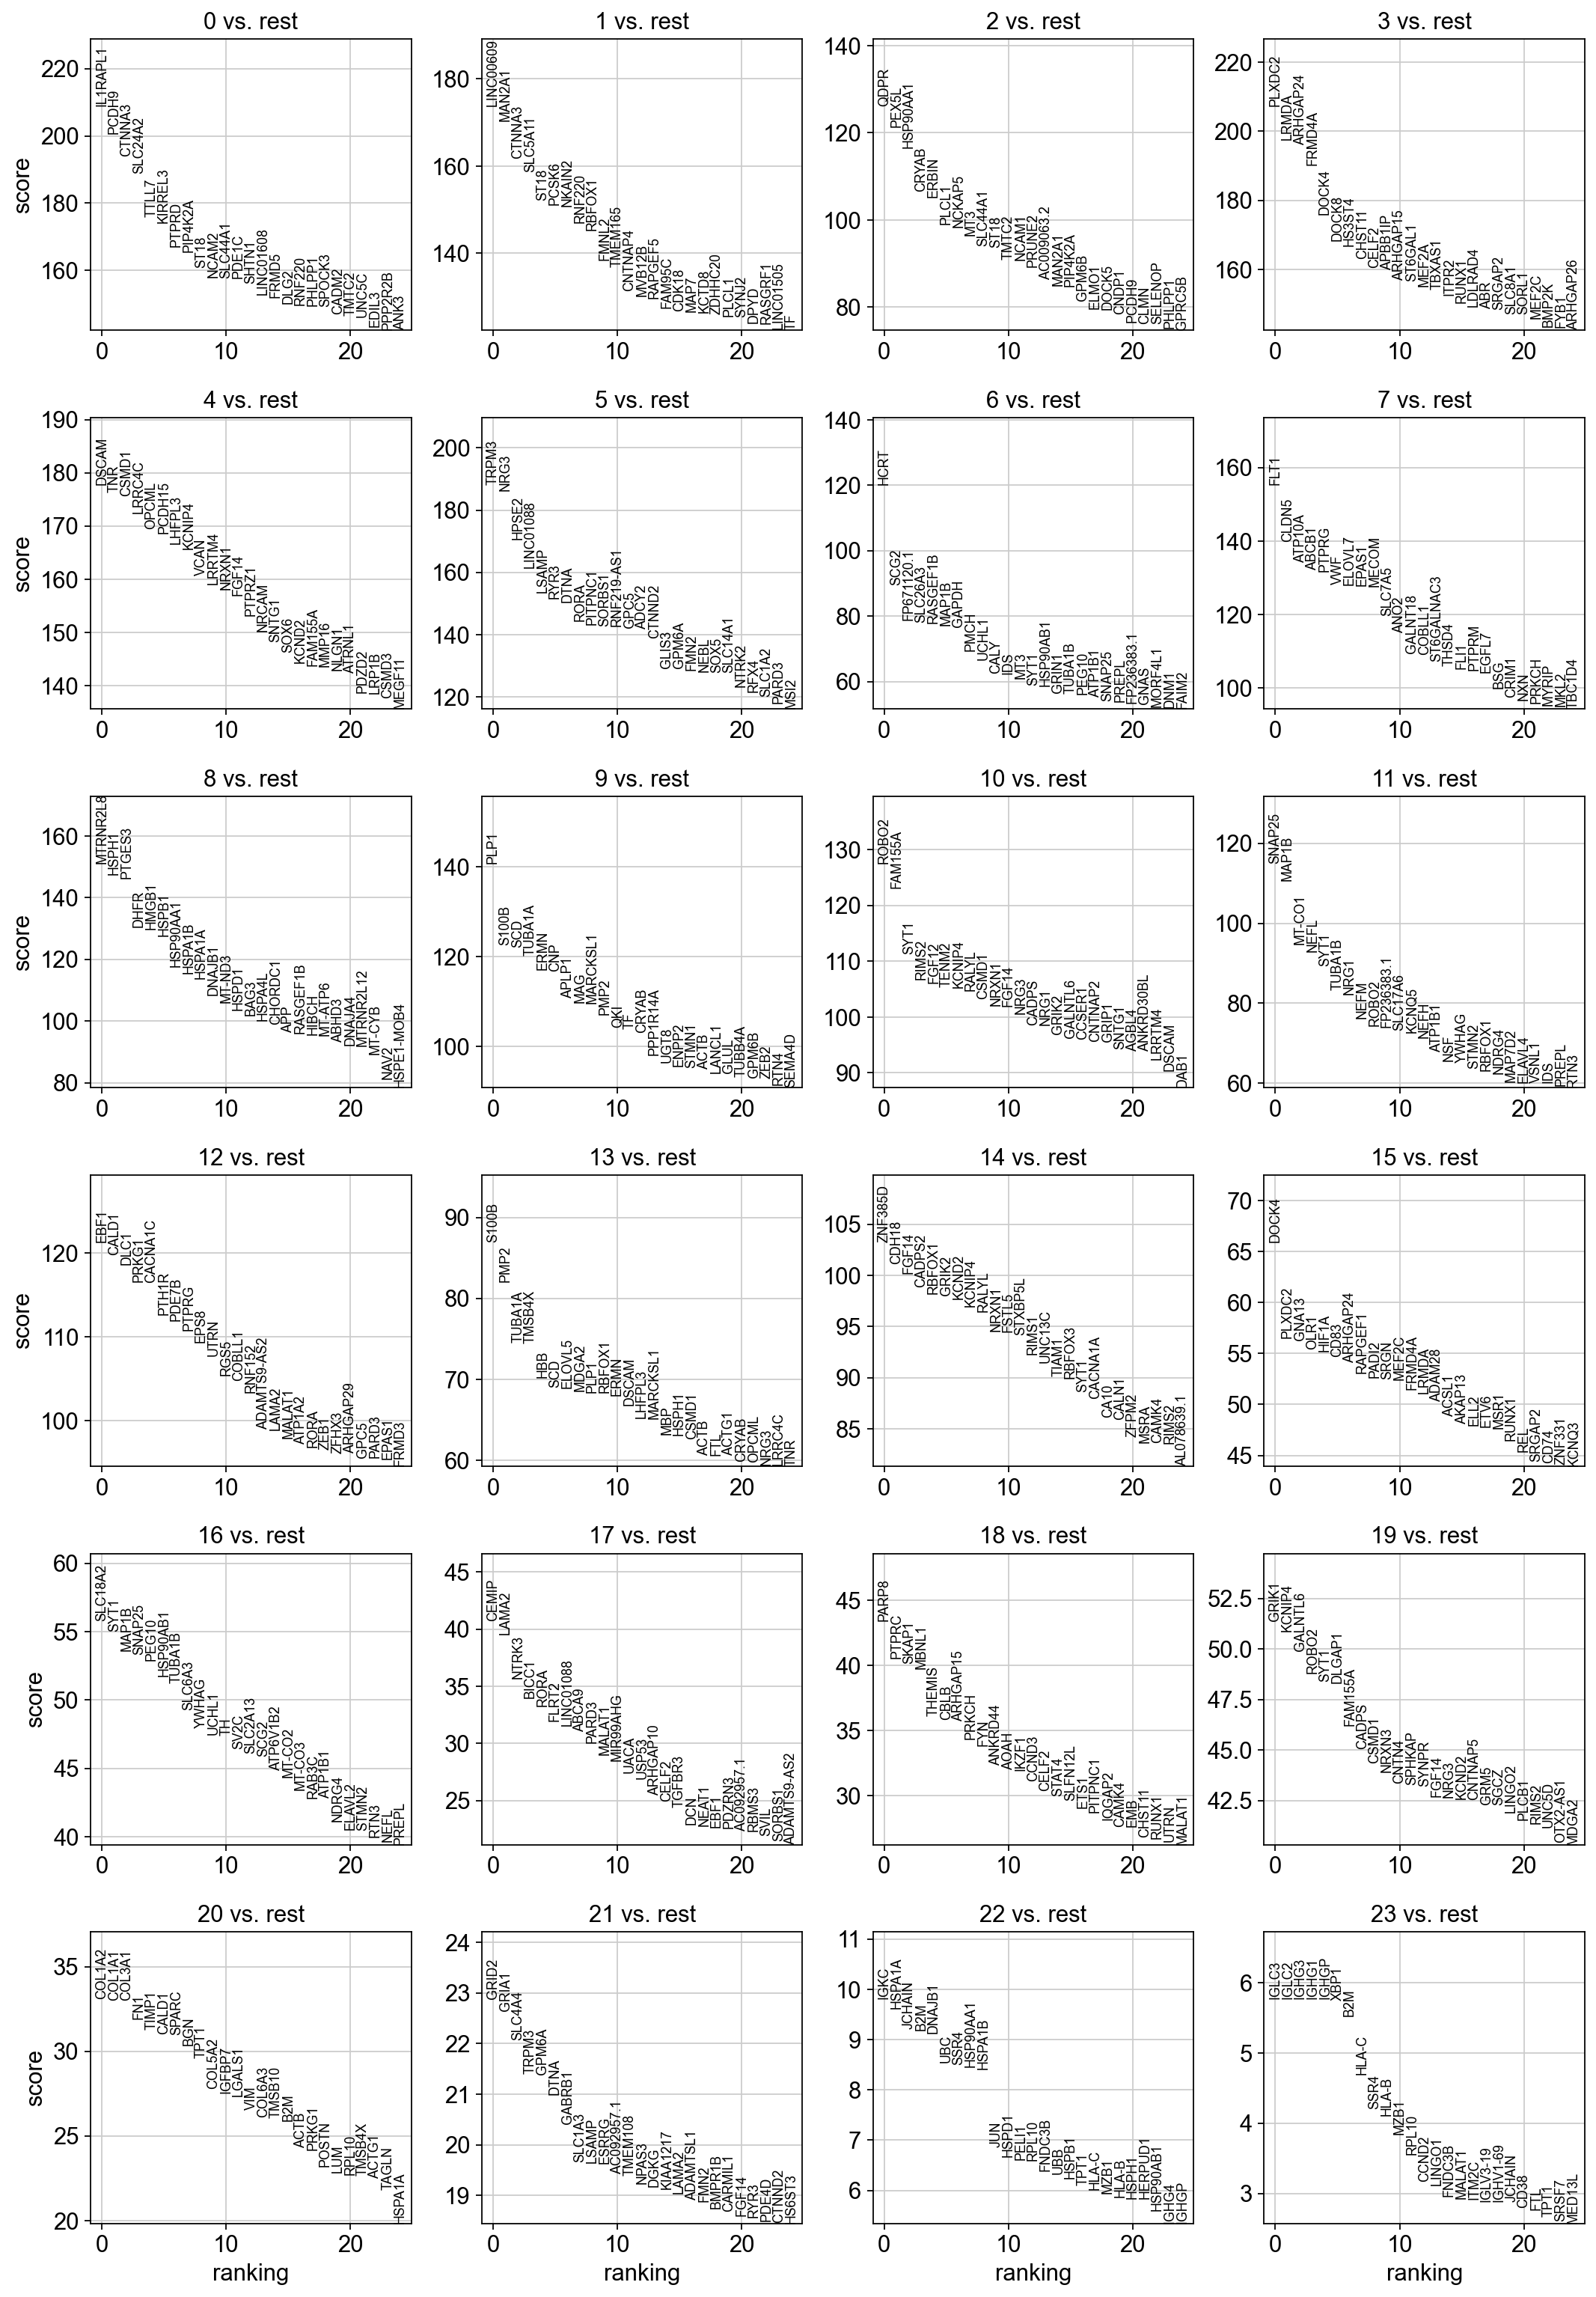

In [38]:
sc.tl.rank_genes_groups(merged_adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(merged_adata, n_genes=25, sharey=False, ncols=4)

In [39]:
merged_adata.write(results_file)

ranking genes
    finished (1:44:50)


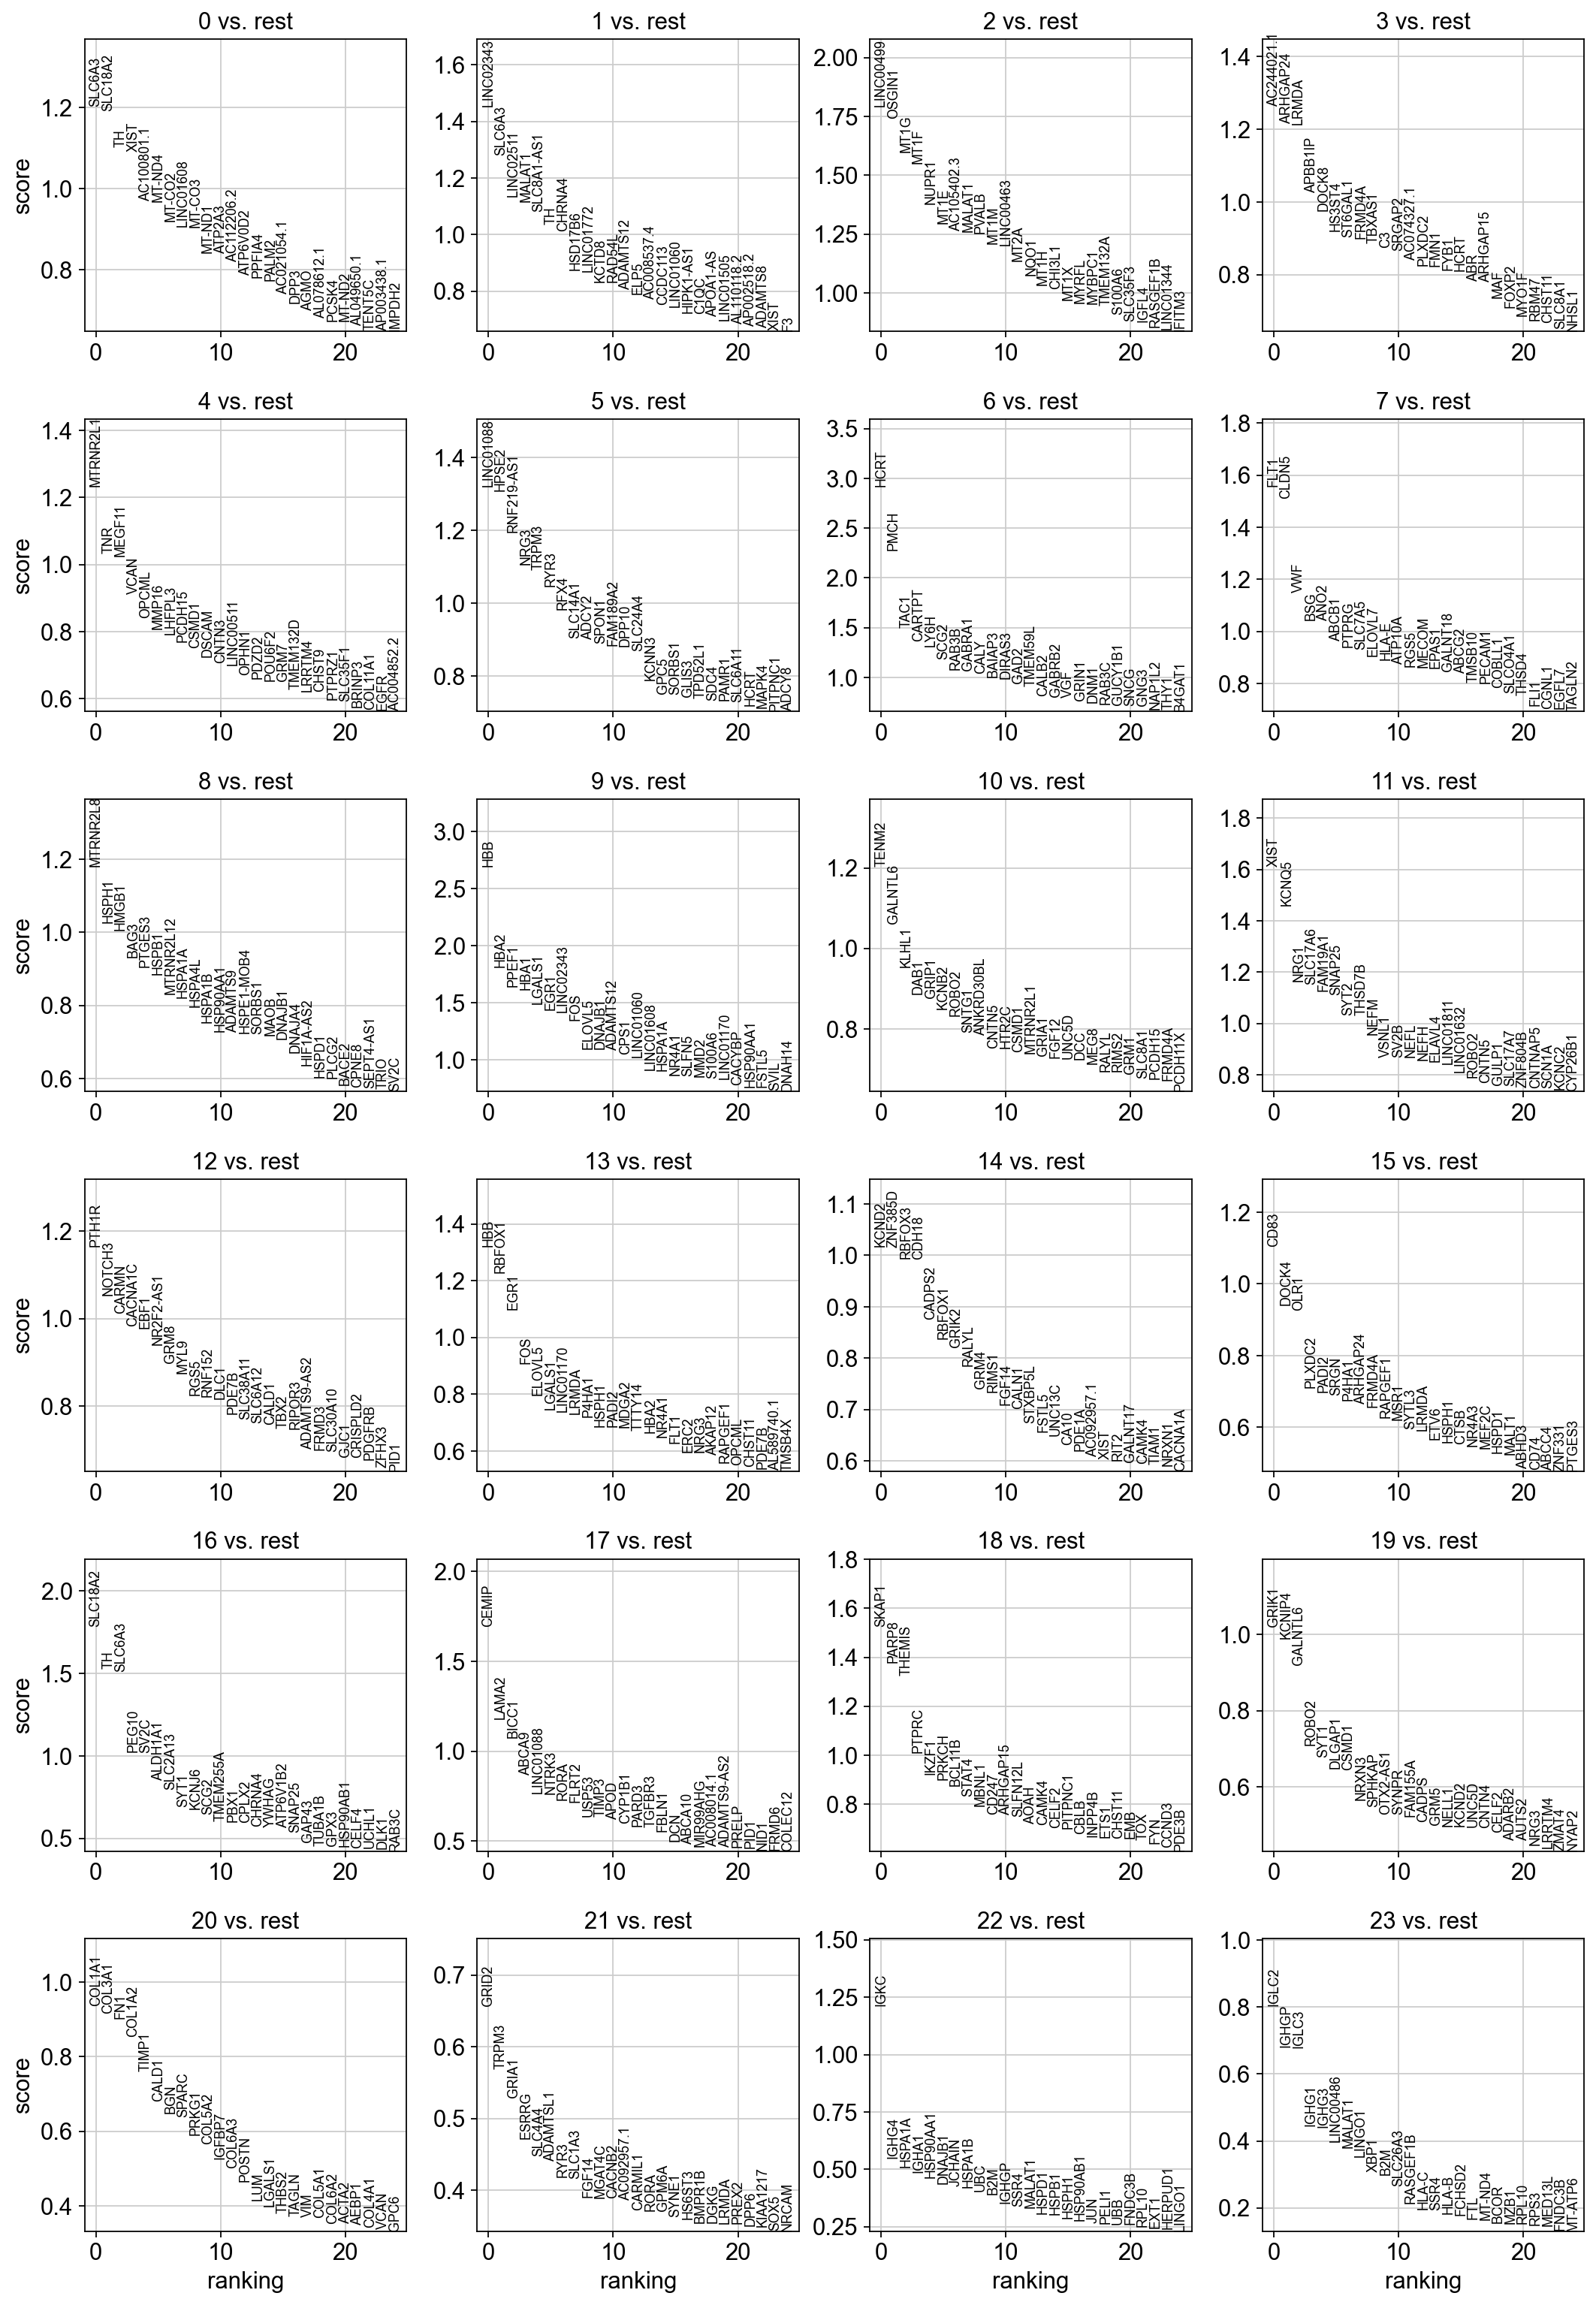

In [40]:
sc.tl.rank_genes_groups(merged_adata, "leiden", method="logreg", max_iter=1000)
sc.pl.rank_genes_groups(merged_adata, n_genes=25, sharey=False, ncols=4)

In [41]:
merged_adata = sc.read(results_file)

In [42]:
pd.DataFrame(merged_adata.uns["rank_genes_groups"]["names"]).head(10)

0          1         2         3       4          5           6  \
0  IL1RAPL1  LINC00609      QDPR    PLXDC2   DSCAM      TRPM3        HCRT   
1     PCDH9     MAN2A1     PEX5L     LRMDA     TNR       NRG3        SCG2   
2    CTNNA3     CTNNA3  HSP90AA1  ARHGAP24   CSMD1      HPSE2  FP671120.1   
3   SLC24A2    SLC5A11     CRYAB    FRMD4A  LRRC4C  LINC01088     SLC26A3   
4     TTLL7       ST18     ERBIN     DOCK4   OPCML      LSAMP    RASGEF1B   
5   KIRREL3      PCSK6     PLCL1     DOCK8  PCDH15       RYR3       MAP1B   
6     PTPRD     NKAIN2    NCKAP5    HS3ST4  LHFPL3       DTNA       GAPDH   
7   PIP4K2A     RNF220       MT3    CHST11  KCNIP4       RORA        PMCH   
8      ST18     RBFOX1   SLC44A1     CELF2    VCAN    PITPNC1       UCHL1   
9     NCAM2      FMNL2      ST18   APBB1IP  LRRTM4     SORBS1        CALY   

        7         8         9  ...       14        15        16         17  \
0    FLT1  MTRNR2L8      PLP1  ...  ZNF385D     DOCK4   SLC18A2      CEMIP   
1   CLDN5     HSPH1     S100B  ...    CDH18    PLXDC2      SYT1      LAMA2   
2  ATP10A    PTGES3       SCD  ...    FGF14     GNA13     MAP1B      NTRK3   
3   ABCB1      DHFR    TUBA1A  ...   CADPS2      OLR1    SNAP25      BICC1   
4   PTPRG     HMGB1      ERMN  ...   RBFOX1     HIF1A     PEG10       RORA   
5     VWF     HSPB1       CNP  ...    GRIK2      CD83  HSP90AB1      FLRT2   
6  ELOVL7  HSP90AA1     APLP1  ...    KCND2  ARHGAP24    TUBA1B  LINC01088   
7   EPAS1    HSPA1B       MAG  ...   KCNIP4   RAPGEF1    SLC6A3      ABCA9   
8   MECOM    HSPA1A  MARCKSL1  ...    RALYL     PADI2     YWHAG      PARD3   
9  SLC7A5    DNAJB1      PMP2  ...    NRXN1      SRGN     UCHL1     MALAT1   

         18       19      20      21        22     23  
0     PARP8    GRIK1  COL1A2   GRID2      IGKC  IGLC3  
1     PTPRC   KCNIP4  COL1A1   GRIA1    HSPA1A  IGLC2  
2     SKAP1  GALNTL6  COL3A1  SLC4A4    JCHAIN  IGHG3  
3     MBNL1    ROBO2     FN1   TRPM3       B2M  IGHG1  
4    THEMIS     SYT1   TIMP1   GPM6A    DNAJB1  IGHGP  
5      CBLB   DLGAP1   CALD1    DTNA       UBC   XBP1  
6  ARHGAP15  FAM155A   SPARC  GABRB1      SSR4    B2M  
7     PRKCH    CADPS     BGN  SLC1A3  HSP90AA1  HLA-C  
8       FYN    CSMD1    TPT1   LSAMP    HSPA1B   SSR4  
9   ANKRD44    NRXN3  COL5A2   ESRRG       JUN  HLA-B  

[10 rows x 24 columns]

In [43]:
result = merged_adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(10)

0_n  0_p        1_n  1_p       2_n  2_p       3_n  3_p     4_n  4_p  \
0  IL1RAPL1  0.0  LINC00609  0.0      QDPR  0.0    PLXDC2  0.0   DSCAM  0.0   
1     PCDH9  0.0     MAN2A1  0.0     PEX5L  0.0     LRMDA  0.0     TNR  0.0   
2    CTNNA3  0.0     CTNNA3  0.0  HSP90AA1  0.0  ARHGAP24  0.0   CSMD1  0.0   
3   SLC24A2  0.0    SLC5A11  0.0     CRYAB  0.0    FRMD4A  0.0  LRRC4C  0.0   
4     TTLL7  0.0       ST18  0.0     ERBIN  0.0     DOCK4  0.0   OPCML  0.0   
5   KIRREL3  0.0      PCSK6  0.0     PLCL1  0.0     DOCK8  0.0  PCDH15  0.0   
6     PTPRD  0.0     NKAIN2  0.0    NCKAP5  0.0    HS3ST4  0.0  LHFPL3  0.0   
7   PIP4K2A  0.0     RNF220  0.0       MT3  0.0    CHST11  0.0  KCNIP4  0.0   
8      ST18  0.0     RBFOX1  0.0   SLC44A1  0.0     CELF2  0.0    VCAN  0.0   
9     NCAM2  0.0      FMNL2  0.0      ST18  0.0   APBB1IP  0.0  LRRTM4  0.0   

   ...     19_n  19_p    20_n           20_p    21_n           21_p      22_n  \
0  ...    GRIK1   0.0  COL1A2  8.666568e-240   GRID2  8.481893e-116      IGKC   
1  ...   KCNIP4   0.0  COL1A1  1.157922e-238   GRIA1  1.721067e-113    HSPA1A   
2  ...  GALNTL6   0.0  COL3A1  1.183024e-238  SLC4A4  7.592613e-108    JCHAIN   
3  ...    ROBO2   0.0     FN1  5.249994e-223   TRPM3  1.291005e-101       B2M   
4  ...     SYT1   0.0   TIMP1  6.582493e-215   GPM6A  1.880997e-101    DNAJB1   
5  ...   DLGAP1   0.0   CALD1  8.010822e-211    DTNA   9.756539e-98       UBC   
6  ...  FAM155A   0.0   SPARC  1.135334e-210  GABRB1   1.262328e-92      SSR4   
7  ...    CADPS   0.0     BGN  1.532368e-202  SLC1A3   5.287150e-86  HSP90AA1   
8  ...    CSMD1   0.0    TPT1  2.543724e-192   LSAMP   6.128713e-86    HSPA1B   
9  ...    NRXN3   0.0  COL5A2  1.276004e-169   ESRRG   8.388125e-86       JUN   

           22_p   23_n          23_p  
0  1.106917e-22  IGLC3  8.192280e-09  
1  7.058288e-22  IGLC2  8.193414e-09  
2  3.350492e-20  IGHG3  8.194112e-09  
3  4.383372e-20  IGHG1  8.195422e-09  
4  6.867904e-20  IGHGP  8.195858e-09  
5  1.345465e-17   XBP1  9.051492e-09  
6  1.946269e-17    B2M  3.289771e-08  
7  2.967818e-17  HLA-C  2.689760e-06  
8  3.931334e-17   SSR4  2.692378e-05  
9  6.985025e-12  HLA-B  4.035411e-05  

[10 rows x 48 columns]

ranking genes


    finished (0:02:12)


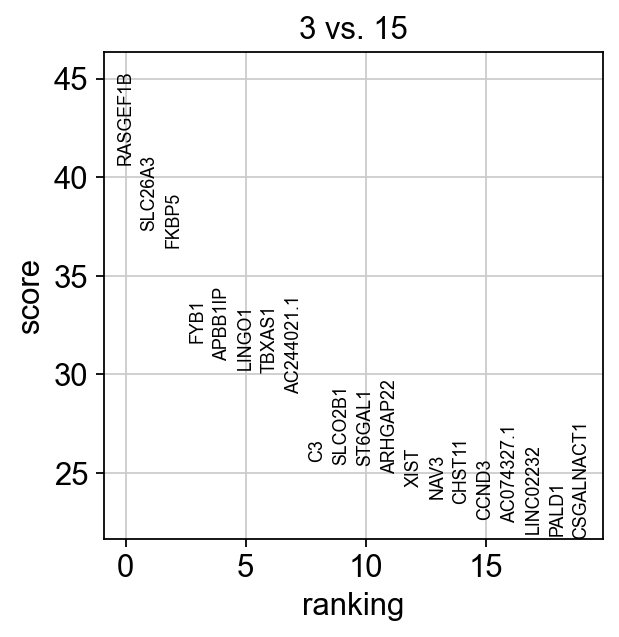

In [49]:
sc.tl.rank_genes_groups(merged_adata, "leiden", groups=["3"], reference="15", method="wilcoxon")
sc.pl.rank_genes_groups(merged_adata, groups=["3"], n_genes=20)

In [50]:
merged_adata = sc.read(results_file)

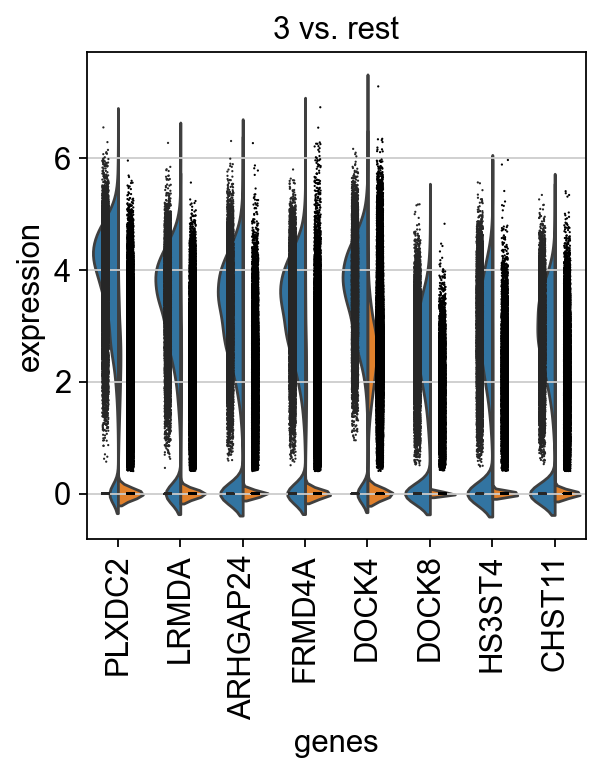

In [51]:
sc.pl.rank_genes_groups_violin(merged_adata, groups="3", n_genes=8)

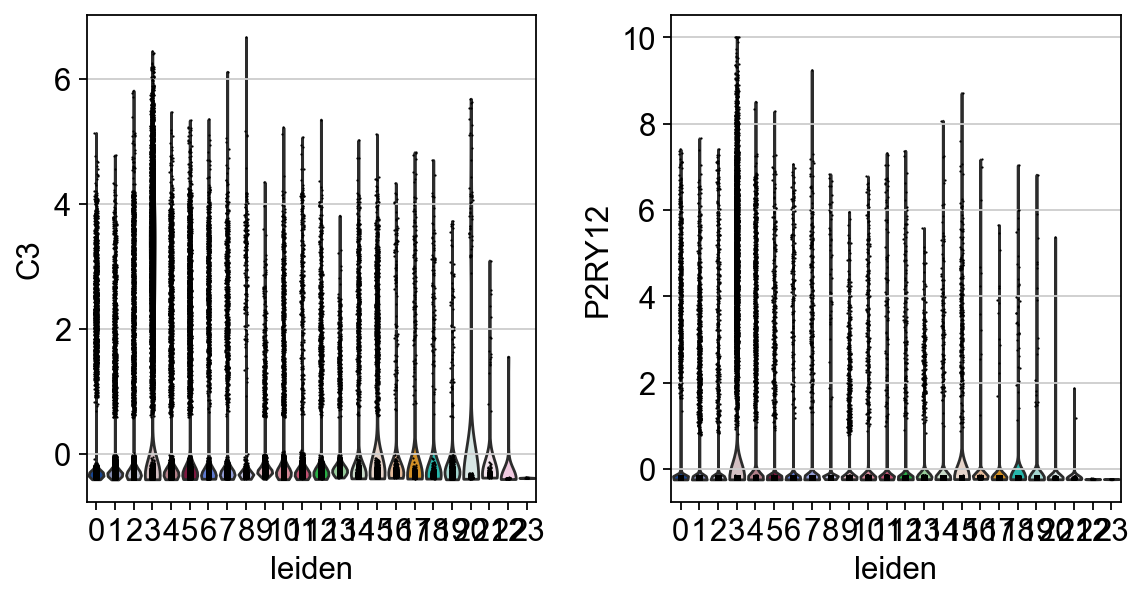

In [54]:
sc.pl.violin(merged_adata, ["C3", "P2RY12"], groupby= "leiden", use_raw=False)